#Exploratory Data Analysis Project


#Introduction

This project does exploratory data analysis, first with a classification dataset on the smartest people throughout history in which we test various classification algorithms (target = gender).

The Second goal of this project is to assess different kinds of regression on weather data. (target = temprature (C))

# Table of Contents


1.   Preliminary Analysis
2.   Understanding of Our Data
3.   Preprocessing and Feature Selection For Classification and Regression Algos
4.   Feature Selection and PCA
5.   Classification Algorithms
6.  Regression
7. Conclusion

*Each section number is denoted in Roman Numerals




The first dataset is on the smartest people throughout history

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Upload dataset
from google.colab import files
x = files.upload()

data = pd.read_csv('/content/top_intelligent_people_in_the_world_5000.csv')
data.head()

,Name,Country,Field of Expertise,IQ,Achievements,Birth Year,Gender,Notable Works,Awards,Education,Influence
0,Enrico Fermi,Austria,Polymath,199,Father of Computer Science,1968,Female,E=mc²,Numerous Posthumous,Self-taught,Popularizing science and cosmology
1,Max Planck,Italy,Chemistry,159,Theory of Evolution,1986,Female,Bohr Model,Nobel Prize,Ph.D. in Astronomy,Foundational work in quantum mechanics
2,Paul Dirac,UK,Physics,177,Quantum Mechanics,1927,Female,Cosmos,Nobel Prize,Ph.D. in Mathematics,Foundation of classical mechanics
3,Erwin Schrödinger,Italy,Physics,130,Electromagnetic Induction,1921,Female,Discovery of Electromagnetic Induction,Nobel Prize,University of Cambridge,Iconic Renaissance artist and inventor
4,Paul Dirac,UK,Physics,163,Wave Equation,1964,Female,On Computable Numbers,Nobel Prize,Ph.D. (honorary),Foundational work in quantum mechanics


The data has eleven columns:

*   Name (Nominal)
*   Country (Categorical)
*   Field Of Expertise (Categorical)
*   IQ (Numerical)
*   Achievements (Nominal)
*   Birth Year (Numerical)
*   Gender (Binary Category)
*   Notable Works (Nominal)
*   Awards (Categorical)
*   Education (Categorical)
*   Influence (Categorical)

Note: Much of the categories seem incorrect to the actual facts,


# i) Preliminary Analysis


<Axes: xlabel='Field of Expertise'>

<Figure size 640x480 with 0 Axes>

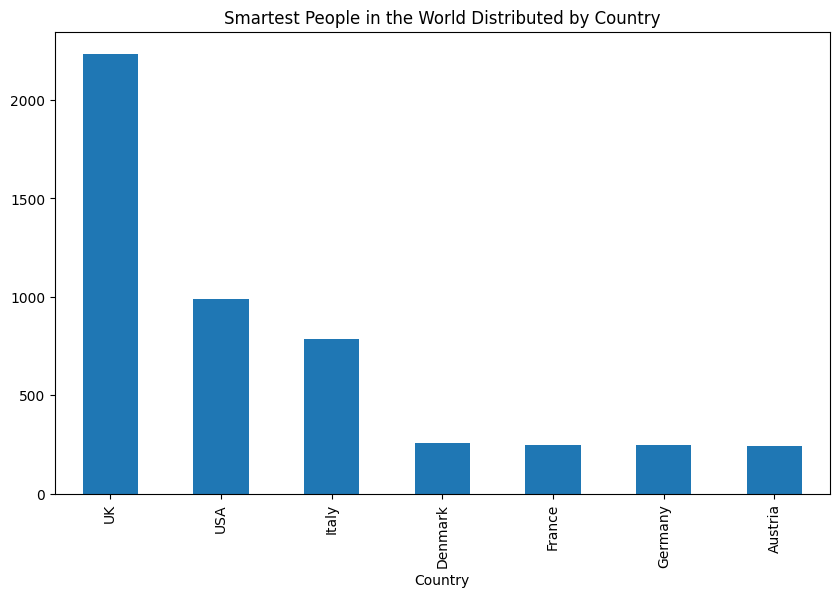

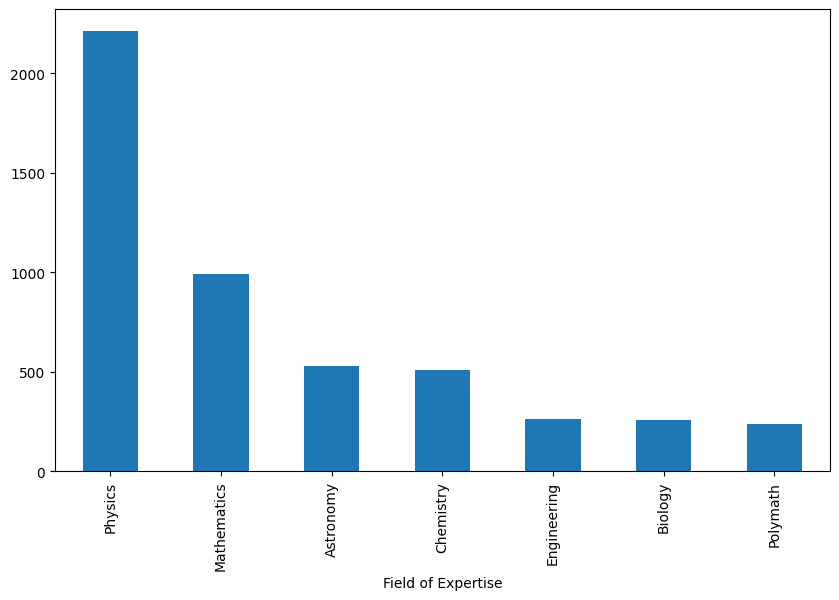

In [ ]:
#Plot the data
plt.figure(0)
plt.figure(figsize =(10,6))
#Count the Smartest 1000 People per industry
Country_values = data['Country'].value_counts()
Country_values.plot(kind='bar')
plt.title('Smartest People in the World Distributed by Country')


plt.figure(1)
plt.figure(figsize=(10,6))
Field_values = data['Field of Expertise'].value_counts()
Field_values.plot(kind='bar')

Majority of the smartest people throughout history are from the UK, USA and europe with the top Fields of Expertise in Physics, Mathematics and Astronomy

# ii) Understanding of Our Data

Begin K mean clustering with IQ and Birth Year. First we need to find out what the optimal K for clustering is.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'Inertia')

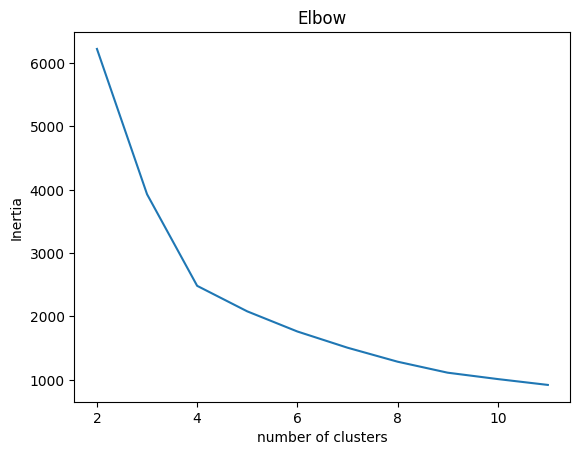

In [ ]:
#Make a category for Numeric Columns
NumCols = ['IQ','Birth Year']
X = data[NumCols]

#Begin Kmeans CLustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = np.array(scaler.fit_transform(X))

models = []
inertias = []

k = range(2,12)
for i in k:
  model = KMeans(n_clusters=i).fit(X_scaled)
  models.append(model)
  inertias.append(model.inertia_)

#Plot the inertias
plt.title('Elbow')
plt.plot(k,inertias)
plt.xlabel('number of clusters')
plt.ylabel('Inertia')


By the "Elbow Method", 4 seems to be the most Optimal number of Clusters to Use in KMeans clustering

In [ ]:
models[2]

KMeans(n_clusters=4)

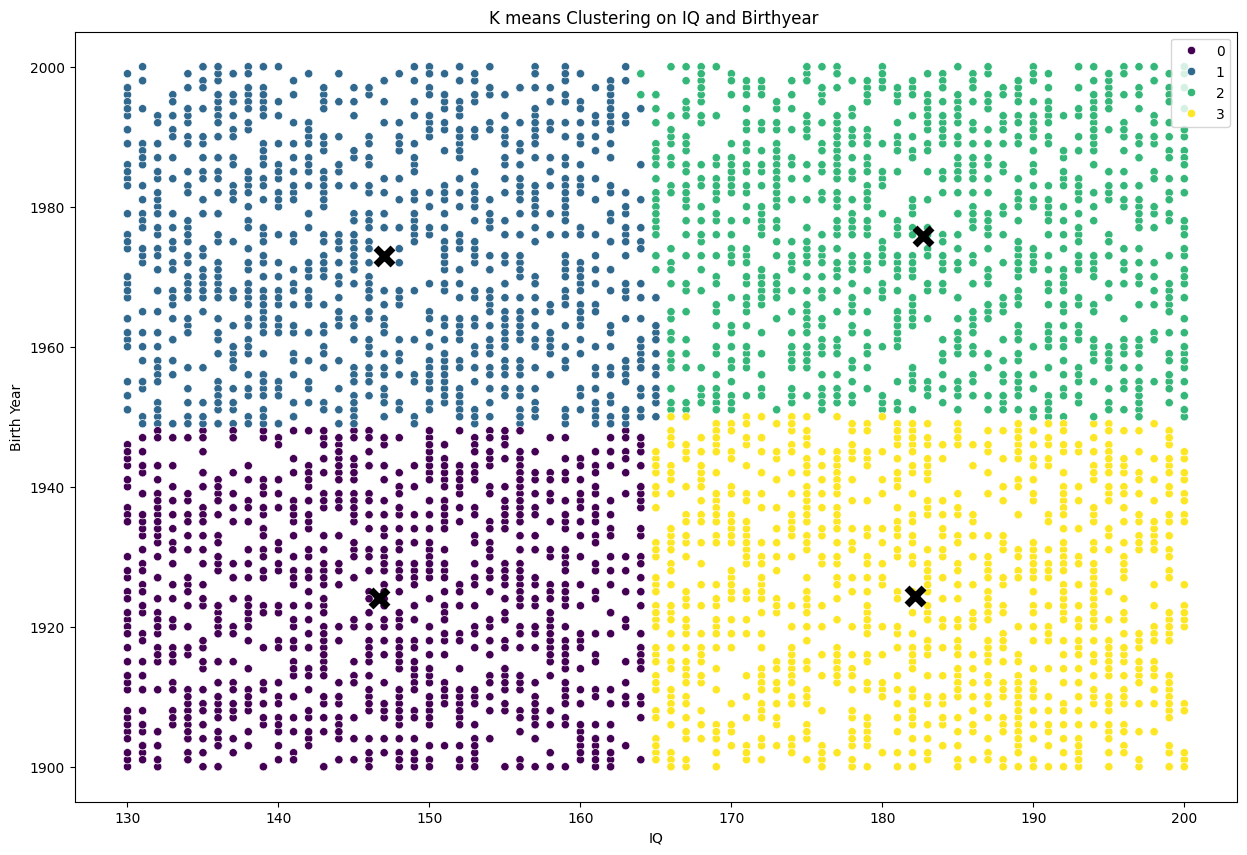

In [ ]:
#Plot K means clustering
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('K means Clustering on IQ and Birthyear ')
sns.scatterplot(data = X, x = 'IQ', y='Birth Year', hue = models[2].labels_, palette = 'viridis')

centroids = scaler.inverse_transform(models[2].cluster_centers_)

plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=150,
   linewidths = 5, zorder = 10, c=['black'])


In [ ]:
unique_labels, counts = np.unique(models[2].labels_, return_counts=True)
print(counts)

[1225 1255 1270 1250]


We see that There is not much distance between the groups and we see that there are 4 groups



1.   Born 1900 - 1950, IQ 130 - 160
2.   Born 1950 - 2000, IQ 130 - 160
3.   Born 1900 - 1950, IQ 150 - 200
4.   Born 1950 - 2000, IQ 150 - 200

Thus there seems to be a relatively uniform distribution of Geniuses throught this time period as each cluster has a similar ammount of members. Its very obvious that there is no particular relationship between these two variables


# iii) Preprocessing and Feature Selection For Classification and Regression Algos

First we make a copy of our Dataset to begin preprocessing

In [ ]:
newdata = data

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Preparing dataset for Classification Algorithms
Gender_enc, Country_enc, Field_enc, Awards_enc, Education_enc= LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()


#Change the Categories for Countries and Field of Study
newdata['Gender'] = Gender_enc.fit_transform(newdata['Gender'])
newdata['Country'] = Country_enc.fit_transform(newdata['Country'])
newdata['Field of Expertise'] = Field_enc.fit_transform(newdata['Field of Expertise'])
newdata['Awards'] = Awards_enc.fit_transform(newdata['Awards'])
newdata['Education'] = Education_enc.fit_transform(newdata['Education'])

newdata.head()

,Name,Country,Field of Expertise,IQ,Achievements,Birth Year,Gender,Notable Works,Awards,Education,Influence
0,Enrico Fermi,0,6,199,Father of Computer Science,1968,0,E=mc²,3,6,Popularizing science and cosmology
1,Max Planck,4,2,159,Theory of Evolution,1986,0,Bohr Model,1,2,Foundational work in quantum mechanics
2,Paul Dirac,5,5,177,Quantum Mechanics,1927,0,Cosmos,1,4,Foundation of classical mechanics
3,Erwin Schrödinger,4,5,130,Electromagnetic Induction,1921,0,Discovery of Electromagnetic Induction,1,7,Iconic Renaissance artist and inventor
4,Paul Dirac,5,5,163,Wave Equation,1964,0,On Computable Numbers,1,1,Foundational work in quantum mechanics


First Off, There is no point the Nominal Categories such as Name, Achievements and Notable Works categories are all independent of each other and thus should can be ignored for much of our Classification, Regression or Other Algorithms.

Lets try and predict the gender of a historically intelligent person as it could reflect or diverge from future trends of intelligence (pretend the dataset more accurate than it really is for the sake of the argument). First we will need to select the most optimal features for selection to avoid correlating variables with no particular relationship.

#iV) Feature Selection and PCA

Begin Feature Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [ ]:
#Create features and Target of gender
features = ['Country','Field of Expertise','IQ','Birth Year','Awards','Education']
X = newdata[features]
y = newdata['Gender']

LR = LogisticRegression(multi_class='ovr',solver='lbfgs',max_iter=10000)
rfecv = RFECV(estimator = LR, step = 1, cv=StratifiedKFold(10),scoring ='accuracy',)
rfecv.fit(X,y)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(max_iter=10000, multi_class='ovr'),
      scoring='accuracy')

In [ ]:
print(f"Optimal number of features : {rfecv.n_features_}")


Optimal number of features : 4


In [ ]:
print(features)
rfecv.support_

['Country', 'Field of Expertise', 'IQ', 'Birth Year', 'Awards', 'Education']


array([ True,  True, False, False,  True,  True])

In [ ]:
rfecv.ranking_

array([1, 1, 2, 3, 1, 1])

Therfore IQ and Birth Year are not important to determining the gender of a historically high IQ person. Furthermore the remaing features are all equally important

In [ ]:
features = ['Country','Field of Expertise','Awards','Education']
X = newdata[features]

Begin Principal Component Analysis Of remaining features

Original data set dimension:  (5000, 4)
new dimensionality:  (5000, 3)
variance each PC explains:  [0.25479197 0.25293171 0.24837284]


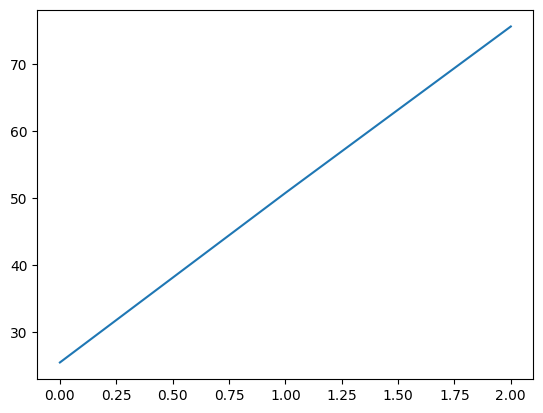

In [ ]:
from sklearn import decomposition

#Run PCA algo
print('Original data set dimension: ', X.shape)
pca = decomposition.PCA(n_components=3)

scaler = StandardScaler()
X_scaled = np.array(scaler.fit_transform(X))

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('new dimensionality: ', X_pca.shape)

#Ammount of variance each PC explains
variance_Data = pca.explained_variance_ratio_
print('variance each PC explains: ', variance_Data)


#Scree plot of variance
var1_Data=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1_Data)
plt.show()



There seems to be no elbow point in which the explained variance decreases. Thus there is no dominant point in which one component captures a larger amount of variance than the otherslarge

Each component captures a similar ammount of Variance

# V) Classification Algorithms

The Goal of the Classification Algorithms will assess the efficiency of

In [ ]:
X.head()

,Country,Field of Expertise,Awards,Education
0,0,6,3,6
1,4,2,1,2
2,5,5,1,4
3,4,5,1,7
4,5,5,1,1


Next we will Perform Multivariate Logistic Regression

In [ ]:
#Begin training Logistic Regression Model
from sklearn.model_selection import train_test_split

#Split into Training and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,random_state = 0)

#Train Logistic Regression
LR.fit(X_train,y_train)

y_prob = LR.predict_proba(X_test)




Evaluate the Logistic Regression Model

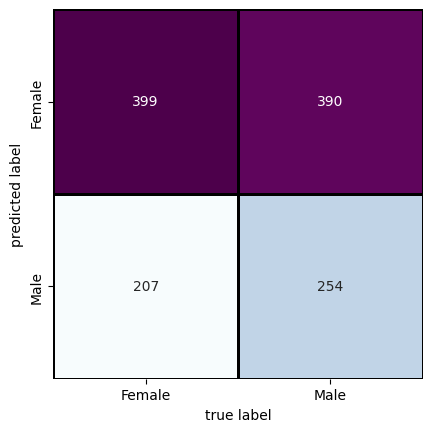

              precision    recall  f1-score   support

           0       0.51      0.66      0.57       606
           1       0.55      0.39      0.46       644

    accuracy                           0.52      1250
   macro avg       0.53      0.53      0.52      1250
weighted avg       0.53      0.52      0.51      1250



In [ ]:
pred = LR.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

labels=['Female','Male']
conf = confusion_matrix(y_test,pred)
sns.heatmap(conf.T, square=True, annot=True, fmt = 'd',cbar = False, xticklabels = labels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = labels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

print(classification_report(y_test,pred))

Next we will perform a DecisionTreeClassifier and RandomForestClassifier With a confusion Matrix for Model Evaluation

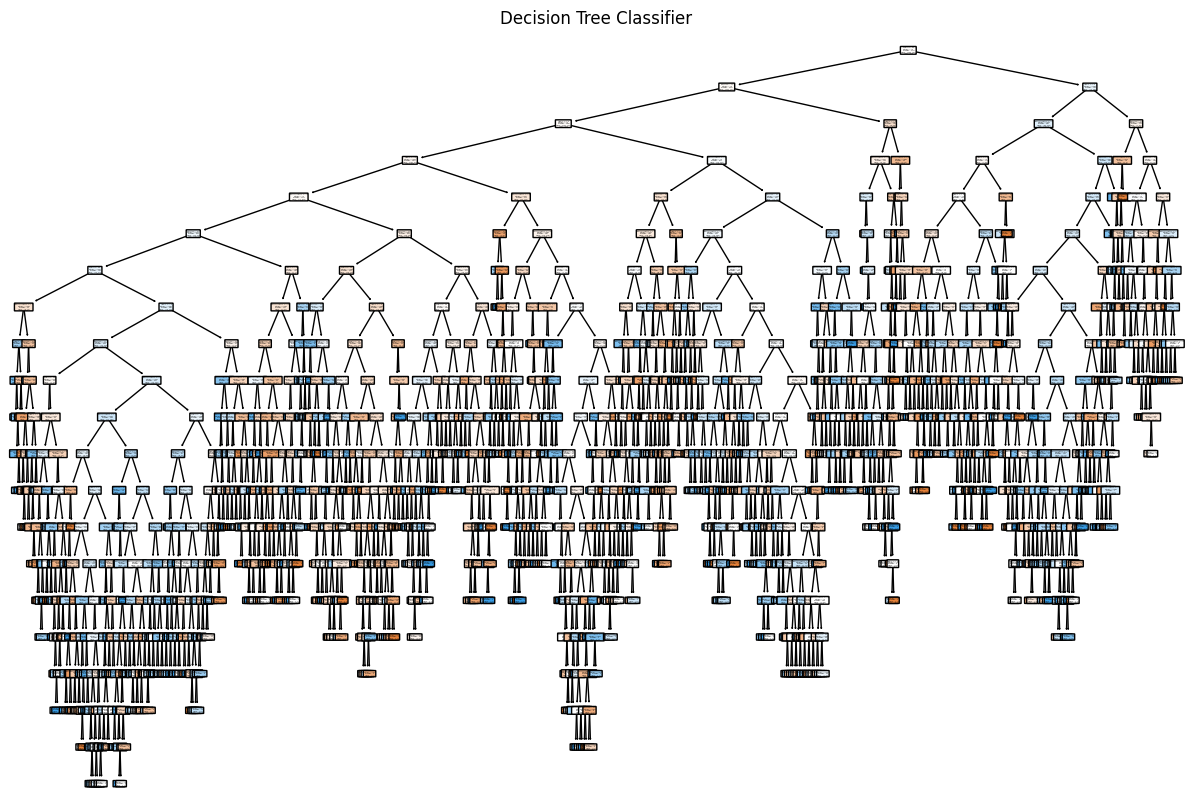

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

#Decision Tree Classifier
DecisionTree = DecisionTreeClassifier(criterion ='entropy',random_state=0).fit(X_train,y_train)

#Plot the DecisionTree
plt.figure(figsize=(15,10))
plot_tree(DecisionTree, feature_names=['Country','Field of Expertise','Awards','Education'],class_names = ['Male','Female'],filled=True,rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

Evaluate the decision Tree

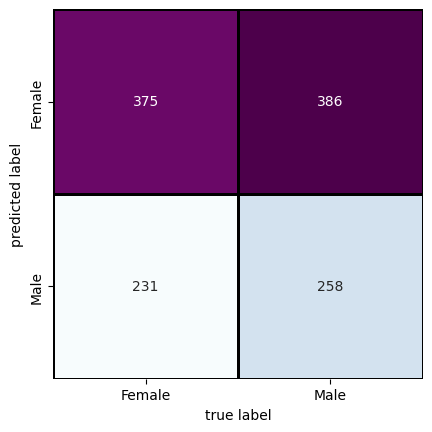

              precision    recall  f1-score   support

           0       0.49      0.62      0.55       606
           1       0.53      0.40      0.46       644

    accuracy                           0.51      1250
   macro avg       0.51      0.51      0.50      1250
weighted avg       0.51      0.51      0.50      1250



In [ ]:
#Evaluate the Decision Tree
pred = DecisionTree.predict(X_test)

labels=['Female','Male']
conf = confusion_matrix(y_test,pred)
sns.heatmap(conf.T, square=True, annot=True, fmt = 'd',cbar = False, xticklabels = labels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = labels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

print(classification_report(y_test,pred))

To end Classification Algorithms We will perform a Random Forest Classifier

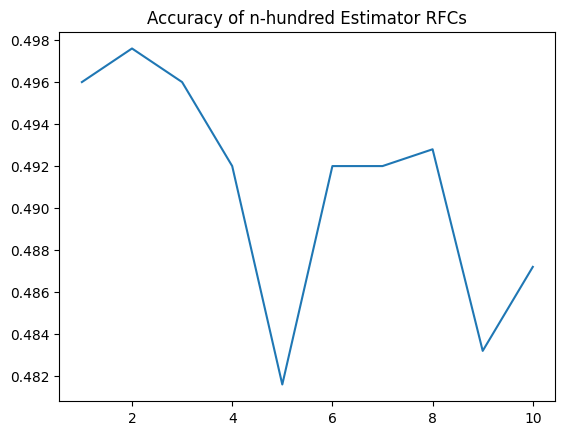

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
models = []
scores = []
for i in range(0,10):
  #Loop and Create Several RFC models with varying number of estimators, track each model and accuracy scores of each model
  model = RandomForestClassifier(n_estimators = (i+1)*100,random_state=0,criterion = 'entropy')
  models.append(model.fit(X_train,y_train))
  scores.append(accuracy_score(y_test,model.predict(X_test)))

plt.title('Accuracy of n-hundred Estimator RFCs')
plt.plot(range(1,11), scores)

It would appear that 200 estimators would be the most Accurate Classifier model

Assess accuracy of Random Forest Classifier

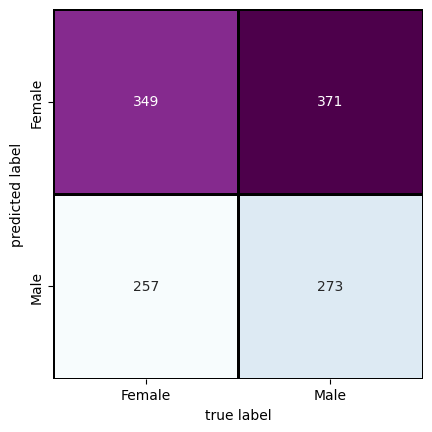

              precision    recall  f1-score   support

           0       0.48      0.58      0.53       606
           1       0.52      0.42      0.47       644

    accuracy                           0.50      1250
   macro avg       0.50      0.50      0.50      1250
weighted avg       0.50      0.50      0.49      1250



In [ ]:
pred = models[1].predict(X_test)

labels=['Female','Male']
conf = confusion_matrix(y_test,pred)
sns.heatmap(conf.T, square=True, annot=True, fmt = 'd',cbar = False, xticklabels = labels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = labels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

print(classification_report(y_test,pred))

**The most Accurate Classification Model for Determining Gender amoung the Smartest People in History was the *Logistic Regression* Model**

# Vi) Regression

For regression we will use a dataset on oceanographic data.



In [ ]:
y = files.upload()
data2 = pd.read_csv('/content/weatherHistory.csv')
data2.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


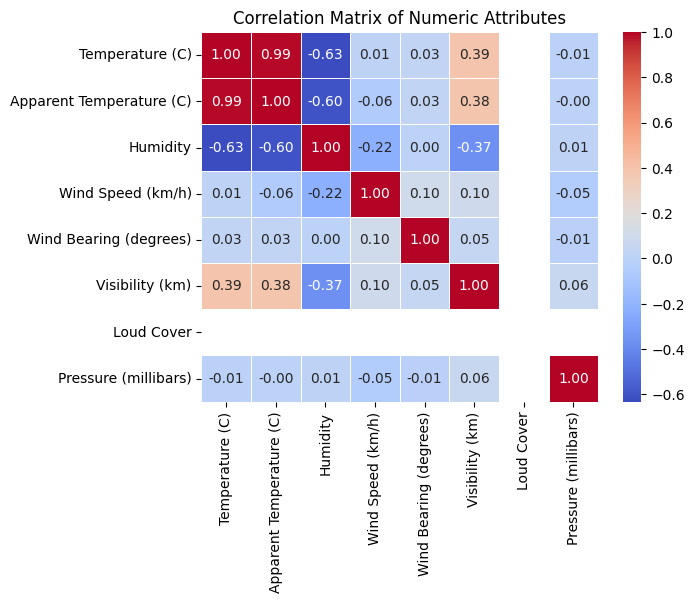

In [ ]:
numeric_cats = data2.select_dtypes(include=[float, int])
correlation_matrix = numeric_cats.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Attributes')
plt.show()

Temperature will be the target for regression. We see there has a strong correlation with Apparent Temperature and a more mild correlation with visibility. Bluer features run in opposite directions to eachother, meaning to increase one would decrease another. Not many of our features correlate positively with eachother.


In [ ]:
#Setup features and target
cols = ['Apparent Temperature (C)', 'Visibility (km)',]
X = data2[cols]
y = data2['Temperature (C)']


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

#Train the Model
LR.fit(X_train,y_train)

#Predict new data:
pred = LR.predict(X_test)

#Evaluate the model
from sklearn.metrics import mean_absolute_error
print('Mean absolute error ',mean_absolute_error(y_test,pred))

Mean absolute error  0.8814119847321185


For Mean absolute error this is a pretty good score. This model thus performed pretty well thus the features selected are decent predictors of the temprature.

Lastly we will see how SVM regression performs and if that is beter than standard linear regression

In [ ]:
from sklearn.svm import LinearSVR

#Train the model
svr = LinearSVR(max_iter = 1000).fit(X_train,y_train)

#Predict new data
pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred))

Mean absolute error:  0.9185800982348905


So far the SVR is less accurate than normal Linear Regression. Lets Increase the iterations on the SVR.

In [ ]:
svr = LinearSVR(max_iter = 10000).fit(X_train,y_train)
pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Mean absolute error:  0.8764274545626021


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred))

Mean absolute error:  0.8764274545626021


The Mean absolute error of our SVM regression has become lower than that of the standard Linear Regression after 10000 iterations, thus we can minimize the errorr more with SVR regression. Thus SVR regression is the superior predictor over Linear regression in this case.

#Conclusion
Both classification and regression models demonstrated strong predictive capabilities, validating the approach and feature selection used in this analysis

The classifiers models all had good accuracy with each model performing similarly with Logistic Regression barely performing the best. The classifier models demonstrated robust performance with each model achieving commendable accuracy.

The different forms of Regression Analysis was also very accurate at predicting temprature data. This means that the selected features were also fairly accurate predictors of weather data.